In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define LeNet
class LeNet(nn.Module):
  def __init__(self, input_dim=1, num_class=10):
    super(LeNet, self).__init__()

    # Convolutional layers
    self.conv1 = nn.Conv2d(input_dim, 20,  kernel_size=5, stride=1, padding=0) 
    self.bn1 = nn.BatchNorm2d(20)
    self.conv2 = nn.Conv2d(20,    50,  kernel_size=5, stride=1, padding=0) 
    self.bn2 = nn.BatchNorm2d(50)
    
    # Fully connected layers
    self.fc1 = nn.Linear(800, 500)
    #self.bn3 = nn.BatchNorm1d(500)
    self.fc2 = nn.Linear(500, num_class)
    
    # Activation func.
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.conv1(x))                                  #  28 x 28 x 1 -> 24 x 24 x 20
    x = self.bn1(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2)  # 12 x 12 x 20
    x = self.relu(self.conv2(x))                                   # -> 8 x 8 x 50
    x = self.bn2(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2)  # -> 4 x 4 x 50

    b,c,h,w = x.size()                                                   # batch, channels, height, width
    x = x.view(b, -1)                                                    # flatten the tensor x -> 800

    x = self.relu(self.fc1(x))          # fc-> ReLU
    x = self.fc2(x)                           # fc
    return x

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([50, 1, 28, 28])
tensor([7, 8, 9, 7, 4, 0, 7, 3, 2, 1, 8, 2, 3, 6, 7, 6, 8, 3, 0, 1, 7, 9, 9, 1,
        4, 6, 3, 6, 6, 9, 5, 0, 3, 5, 4, 1, 9, 9, 0, 6, 9, 2, 2, 1, 1, 7, 8, 3,
        0, 2])


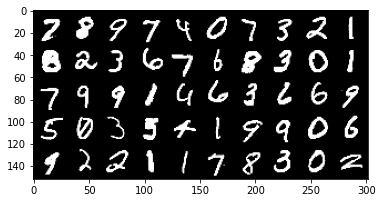

In [ ]:
from   torchvision import datasets as datasets
import torchvision.transforms as transforms
import torch.utils as utils
import matplotlib.pyplot as plt
import torch
import torchvision
# To train the network, you also need 
# i)   a dataset;
# ii)  a loss function;
# iii) an optimizer.

# ------ First let's get the dataset (we use MNIST) ready ------
# We define a function (named as transform) to 
# -1) convert the data_type (np.array or Image) of an image to torch.FloatTensor;
# -2) standardize the Tensor for better classification accuracy 
# The "transform" will be used in "datasets.MNIST" to process the images.
# You can decide the batch size and whether shuffling the samples or not by setting
# "batch_size" and "shuffle" in "utils.data.DataLoader".
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])
mnist_train = datasets.MNIST('./data', train=True,  download=True, transform=transform)
mnist_test  = datasets.MNIST('./data', train=False, download=True, transform=transform)
trainloader = utils.data.DataLoader(mnist_train, batch_size=50, shuffle=True,  num_workers=2)
testloader  = utils.data.DataLoader(mnist_train, batch_size=100, shuffle=False, num_workers=2)

# To see an example of a batch (10 images) of training data 
# Change the "trainloader" to "testloader" to see test data
iter_data = iter(trainloader)
#iter_data = iter(testloader)
images, labels = next(iter_data)
print(images.size())
print(labels)
# Show images
show_imgs = torchvision.utils.make_grid(images, nrow=10).numpy().transpose((1,2,0))
plt.imshow(show_imgs)


In [ ]:
def evaluate_model():
  print("Testing the network...")
  net.eval()
  total_num   = 0
  correct_num = 0
  for test_iter, test_data in enumerate(testloader):
    # Get one batch of test samples
    inputs, labels = test_data    
    bch = inputs.size(0)
    #inputs = inputs.view(bch, -1) <-- We don't need to reshape inputs here (we are using CNNs).

    # Move inputs and labels into GPU
    inputs = inputs.cuda()
    labels = torch.LongTensor(list(labels)).cuda()

    # Forward
    outputs = net(inputs)   

    # Get predicted classes
    _, pred_cls = torch.max(outputs, 1)
#     if total_num == 0:
#        print("True label:\n", labels)
#        print("Prediction:\n", pred_cls)
    # Record test result
    correct_num+= (pred_cls == labels).float().sum().item()
    total_num+= bch
  net.train()
  
  print("Accuracy: "+"%.3f"%(correct_num/float(total_num)))

In [ ]:
# Initialize the network
net = LeNet().cuda()
# To check the net's architecutre
print(net)

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (relu): ReLU()
)


In [ ]:
# You can check the weights in a convolutional kernel (e.g., conv1) by
print(net.conv1.weight.size()) 
print(net.conv1.weight)
print(net.conv1.bias)

torch.Size([20, 1, 5, 5])
Parameter containing:
tensor([[[[ 0.1747,  0.1804, -0.1170, -0.1990, -0.1952],
          [-0.0221, -0.1065,  0.1214,  0.1258, -0.1846],
          [ 0.0279, -0.1929,  0.1788, -0.0671,  0.1335],
          [-0.1709, -0.1304,  0.1373,  0.1696, -0.0148],
          [-0.0146,  0.1679, -0.0655, -0.0088, -0.1296]]],


        [[[ 0.1519, -0.1980,  0.1474, -0.1426, -0.1416],
          [ 0.1850,  0.1000,  0.0879,  0.1922, -0.1926],
          [ 0.1215, -0.1673, -0.0239,  0.0432,  0.1114],
          [ 0.0451,  0.0437,  0.1874, -0.0192, -0.0415],
          [-0.1117, -0.1849,  0.0380, -0.0013,  0.1939]]],


        [[[ 0.1071,  0.0308, -0.1330, -0.1482,  0.1111],
          [-0.1047, -0.1246, -0.1109,  0.1059, -0.0731],
          [-0.1509, -0.0597, -0.1204, -0.0985,  0.1063],
          [ 0.1600, -0.0495,  0.1885,  0.1850,  0.1036],
          [-0.0423, -0.0441,  0.1147,  0.1250, -0.1755]]],


        [[[-0.1606, -0.1598, -0.1406,  0.1867, -0.1871],
          [-0.0787,  0.0752,

In [ ]:
# ------ We define the loss function and the optimizer -------
import torch.optim as optim
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
epoch = 0

In [ ]:
running_loss = 0.0
ct_num = 0
for iteration, data in enumerate(trainloader):
  # Take the inputs and the labels for 1 batch.
  inputs, labels = data
  bch = inputs.size(0)
  #inputs = inputs.view(bch, -1) <-- We don't need to reshape inputs here (we are using CNNs).
  
  # Move inputs and labels into GPU
  inputs = inputs.cuda()
  labels = labels.cuda()

  # Remove old gradients for the optimizer.
  optimizer.zero_grad()

  # Compute result (Forward)
  outputs = net(inputs)

  # Compute loss
  loss    = loss_func(outputs, labels)

  # Calculate gradients (Backward)
  loss.backward()

  # Update parameters
  optimizer.step()
  
  #with torch.no_grad():
  running_loss += loss.item()
  ct_num+= 1
  if iteration%50 == 49:
    #print("Iteration: "+str(iteration+1)+", Loss: "+str(running_loss/ct_num)+'.')
    print("[Epoch: "+str(epoch+1)+"]"" --- Iteration: "+str(iteration+1)+", Loss: "+str(running_loss/ct_num)+'.')
  # Test
  if iteration%300 == 299:
    evaluate_model()
        
epoch += 1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[Epoch: 1] --- Iteration: 50, Loss: 1.5338809716701507.
[Epoch: 1] --- Iteration: 100, Loss: 1.0422452700138092.
[Epoch: 1] --- Iteration: 150, Loss: 0.8017891545097033.
[Epoch: 1] --- Iteration: 200, Loss: 0.6603714290633798.
[Epoch: 1] --- Iteration: 250, Loss: 0.5708731910586358.
[Epoch: 1] --- Iteration: 300, Loss: 0.5044393538186948.
Testing the network...
Accuracy: 0.959
[Epoch: 1] --- Iteration: 350, Loss: 0.4537886312497514.
[Epoch: 1] --- Iteration: 400, Loss: 0.4183023843821138.
[Epoch: 1] --- Iteration: 450, Loss: 0.3897602434704701.
[Epoch: 1] --- Iteration: 500, Loss: 0.3638386619016528.
[Epoch: 1] --- Iteration: 550, Loss: 0.3407796344838359.
[Epoch: 1] --- Iteration: 600, Loss: 0.3214539528762301.
Testing the network...
Accuracy: 0.971
[Epoch: 1] --- Iteration: 650, Loss: 0.3052671237748403.
[Epoch: 1] --- Iteration: 700, Loss: 0.29048356714791485.
[Epoch: 1] --- Iteration: 750, Loss: 0.277127015200754.
[Epoch: 1] --- Iteration: 800, Loss: 0.2648363423952833.
[Epoch: 1] 